In [2]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# This makes plots appear in the notebook
%matplotlib inline

# Import necessary packages
import yfinance as yf
from datetime import datetime, timedelta

# BTC ~ S&P 500 Index: Last Two Years

In [4]:
# Download historical data as a DataFrame
sp2yrs = yf.download('^GSPC', start='2021-07-01', end='2023-07-01')
btc2yrs = yf.download('BTC-USD', start='2021-07-01', end='2023-07-01')

# Resample the data to monthly frequency
sp_historical = sp2yrs.resample('M').last()
btc_historical = btc2yrs.resample('M').last()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


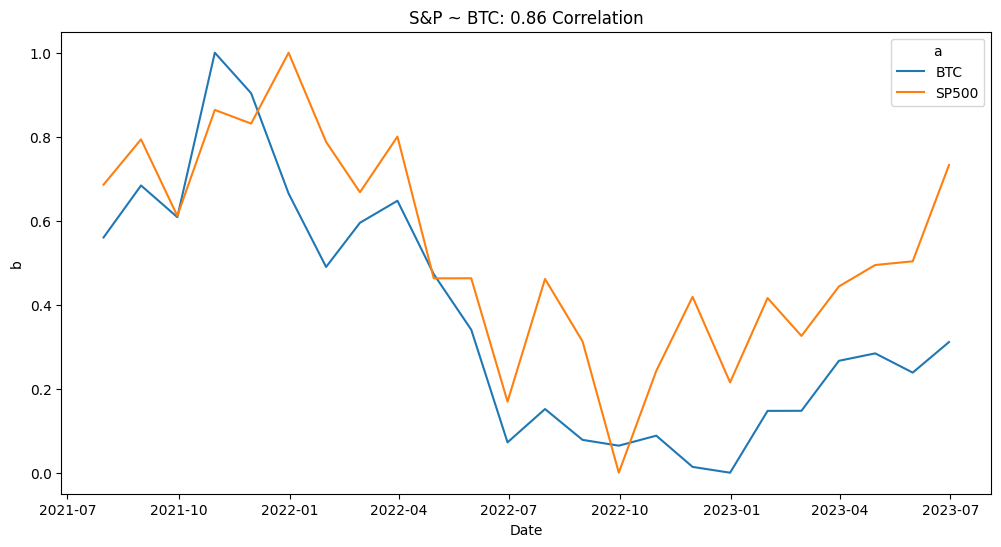

In [7]:
# print correlation between s&p vs btc
correlation2yrs = btc_historical['Close'].corr(sp_historical['Close'])

# Since we're dealing with different scales, we'll normalize the data
sp_historical['Close'] = (sp_historical['Close'] - sp_historical['Close'].min()) / (sp_historical['Close'].max() - sp_historical['Close'].min())
btc_historical['Close'] = (btc_historical['Close'] - btc_historical['Close'].min()) / (btc_historical['Close'].max() - btc_historical['Close'].min())

# Preparing DataFrame for seaborn lineplot
data = pd.concat([btc_historical['Close'].rename('BTC'), sp_historical['Close'].rename('SP500')], axis=1).reset_index()

# Melt the DataFrame to have the structure needed for lineplot
data_melt = data.melt('Date', var_name='a', value_name='b')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="b", hue='a', data=data_melt)
# Add the title
plt.title(f"S&P ~ BTC: {correlation2yrs:.2f} Correlation")  # using f-string to format the title with the correlation
plt.show()

High correlation between BTC and S&P500 indicates that the BTC price only increases because the equities market increases.

# BTC ~ S&P 500 Index: Last 9 Years

In [8]:
# Download historical data as a DataFrame
sp9yrs = yf.download('^GSPC', start='2014-07-01', end='2023-07-01')
btc9yrs = yf.download('BTC-USD', start='2014-07-01', end='2023-07-01')

# Resample the data to monthly frequency
sp_historical2 = sp9yrs.resample('M').last()
btc_historical2 = btc9yrs.resample('M').last()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


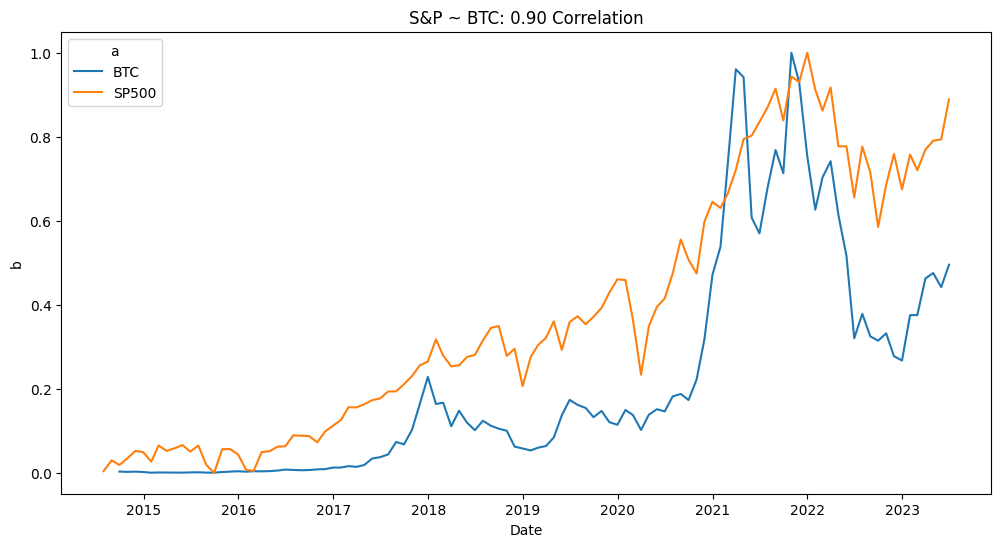

In [9]:
# print correlation between s&p vs btc
correlation9yrs = btc_historical2['Close'].corr(sp_historical2['Close'])

# Since we're dealing with different scales, we'll normalize the data
sp_historical2['Close'] = (sp_historical2['Close'] - sp_historical2['Close'].min()) / (sp_historical2['Close'].max() - sp_historical2['Close'].min())
btc_historical2['Close'] = (btc_historical2['Close'] - btc_historical2['Close'].min()) / (btc_historical2['Close'].max() - btc_historical2['Close'].min())

# Preparing DataFrame for seaborn lineplot
data2 = pd.concat([btc_historical2['Close'].rename('BTC'), sp_historical2['Close'].rename('SP500')], axis=1).reset_index()

# Melt the DataFrame to have the structure needed for lineplot
data_melt2 = data2.melt('Date', var_name='a', value_name='b')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="b", hue='a', data=data_melt2)
# Add the title
plt.title(f"S&P ~ BTC: {correlation9yrs:.2f} Correlation")  # using f-string to format the title with the correlation
plt.show()

Once again, high correlation between BTC and S&P500 indicates that the BTC price only increases because the equities market increases.

# BTC ~ Gold

Some people say that BTC behaves like Gold, a store of value, rather than a currency. Let's analyze the relationship between BTC and Gold.

In [16]:
# Download historical data as a DataFrame
gold9yrs = yf.download('GC=F', start='2014-07-01', end='2023-07-01')
btc9yrs = yf.download('BTC-USD', start='2014-07-01', end='2023-07-01')

# Resample the data to monthly frequency
gold_historical = gold9yrs.resample('M').last()
btc_historical3 = btc9yrs.resample('M').last()

# print correlation between s&p vs btc
correlation3 = gold_historical['Close'].corr(btc_historical3['Close'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


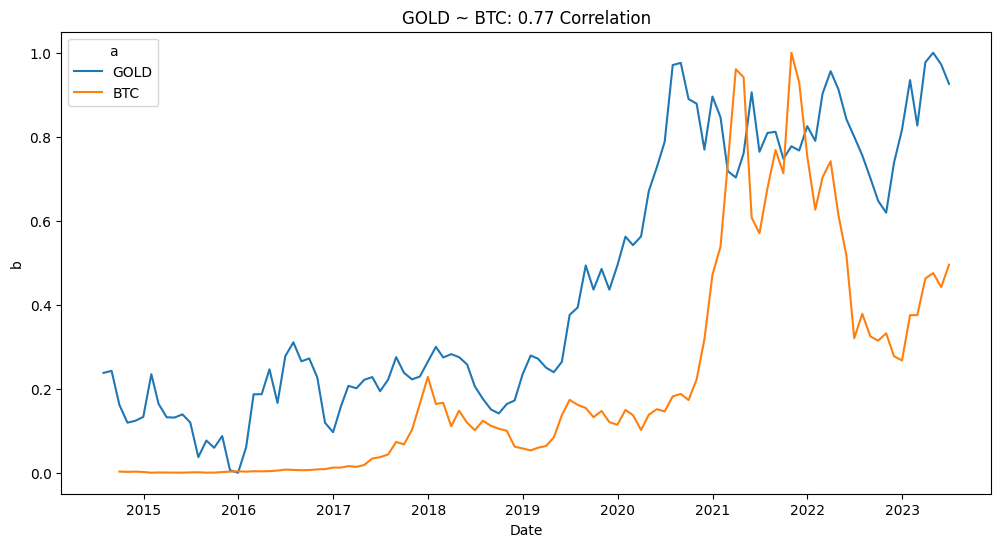

In [17]:
# Since we're dealing with different scales, we'll normalize the data
btc_historical3['Close'] = (btc_historical3['Close'] - btc_historical3['Close'].min()) / (btc_historical3['Close'].max() - btc_historical3['Close'].min())
gold_historical['Close'] = (gold_historical['Close'] - gold_historical['Close'].min()) / (gold_historical['Close'].max() - gold_historical['Close'].min())

# Preparing DataFrame for seaborn lineplot
data_sg = pd.concat([gold_historical['Close'].rename('GOLD'), btc_historical3['Close'].rename('BTC')], axis=1).reset_index()

# Melt the DataFrame to have the structure needed for lineplot
data_melt3 = data_sg.melt('Date', var_name='a', value_name='b')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="b", hue='a', data=data_melt3)
# Add the title
plt.title(f"GOLD ~ BTC: {correlation3:.2f} Correlation")  # using f-string to format the title with the correlation
plt.show()

While the correlation between BTC and Gold is high, it is not as high as the correlation between BTC and the S&P 500.

# BTC ~ Inflation

Let's analyze how BTC relates to US inflation. Do investors buy BTC to hedge against inflation?

In [22]:
# loading inflation data since 2000
inflation = pd.read_csv("us_inflation_2000.csv")

# removing last 2 columns
inflation = inflation.drop(['HALF1', 'HALF2'], axis=1)

# fething data from last 9 years
inflation9yrs = inflation[inflation['Year'] >= 2014]

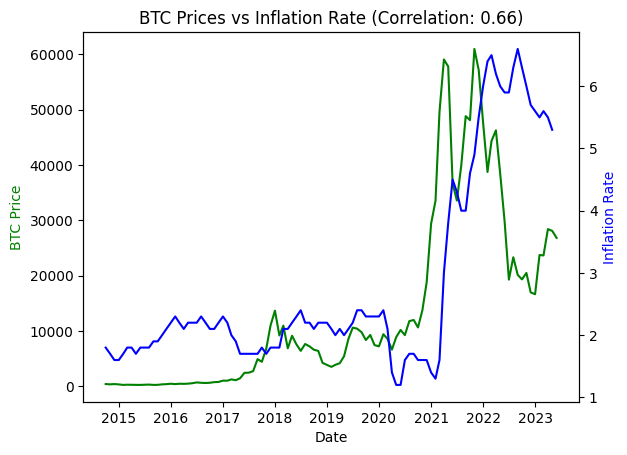

In [30]:
# Melt the dataframe to long format
inflation_long = inflation9yrs.melt(id_vars='Year', var_name='Month', value_name='Inflation')

# Convert 'Month' to its numeric representation
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
inflation_long['Month'] = inflation_long['Month'].map(month_dict)

# Create a datetime column
inflation_long['Date'] = pd.to_datetime(inflation_long[['Year', 'Month']].assign(DAY=1))

# Merge with btc data
btc_inflation = pd.merge(btc9yrs, inflation_long, on='Date', how='inner')

# Compute correlation
correlation4 = btc_inflation['Close'].corr(btc_inflation['Inflation'])

# Plot the data
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(btc_inflation['Date'], btc_inflation['Close'], 'g-')
ax2.plot(btc_inflation['Date'], btc_inflation['Inflation'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price', color='g')
ax2.set_ylabel('Inflation Rate', color='b')

plt.title(f'BTC Prices vs Inflation Rate (Correlation: {correlation4:.2f})')

plt.show()

The correlation between BTC and Inflation is high; however, it is not nearly as high as the correlation between BTC and the S&P 500.

# Conclusion
Bitcoin is more correlated with the S&P 500 than Gold or Inflation. It is clear that the equities market has the most impact on BTC prices. As an investor myself, I reccomend buying equities over Bitcoin. Equities are a safer investment, contribute to the overall economy, and indirectly pay employee salaries. Equity investors not only earn more money long term but help drive our economy forward.